✅ دیتاست بارگذاری شد
Shape اولیه: (5806, 15)
Shape بعد از فیلتر فیلم‌ها: (3759, 15)
✅ پاک‌سازی داده‌ها با موفقیت انجام شد.

Top 10 Countries (Primary Producer):
 primary_country
US    1323
IN     575
GB     169
FR     113
ES     111
JP     109
CA     102
PH      79
MX      69
Name: count, dtype: int64


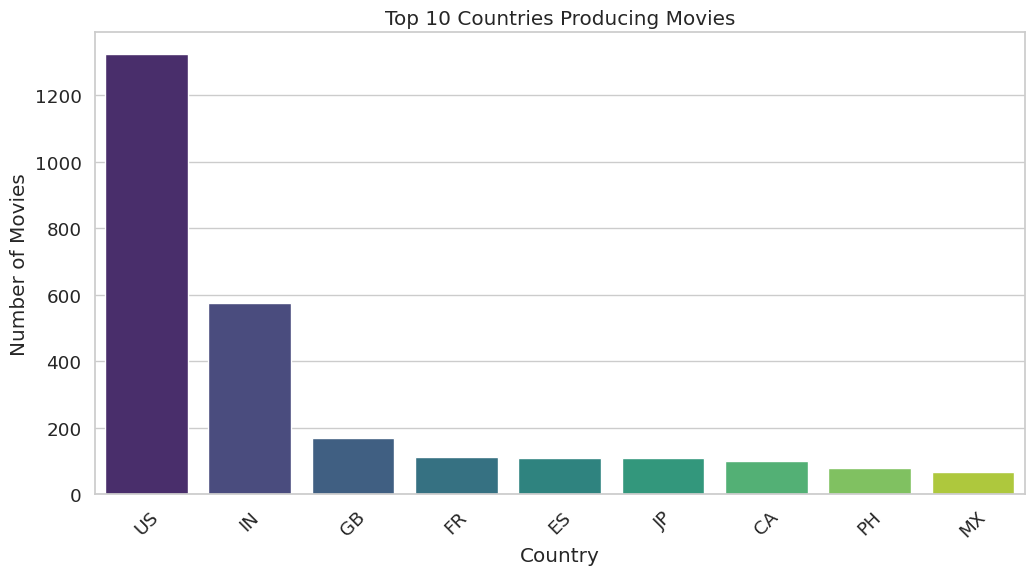

Average Duration: 98.79 minutes


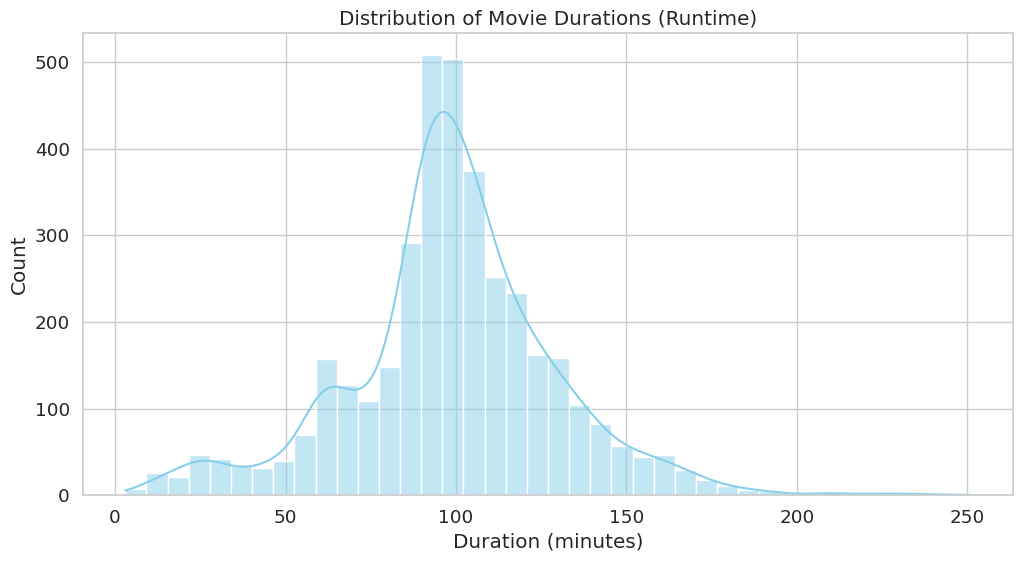

Top 10 Genres:
 genre_list
drama            1864
comedy           1543
thriller          830
romance           694
action            641
documentation     590
crime             524
european          357
family            329
fantasy           321
Name: count, dtype: int64


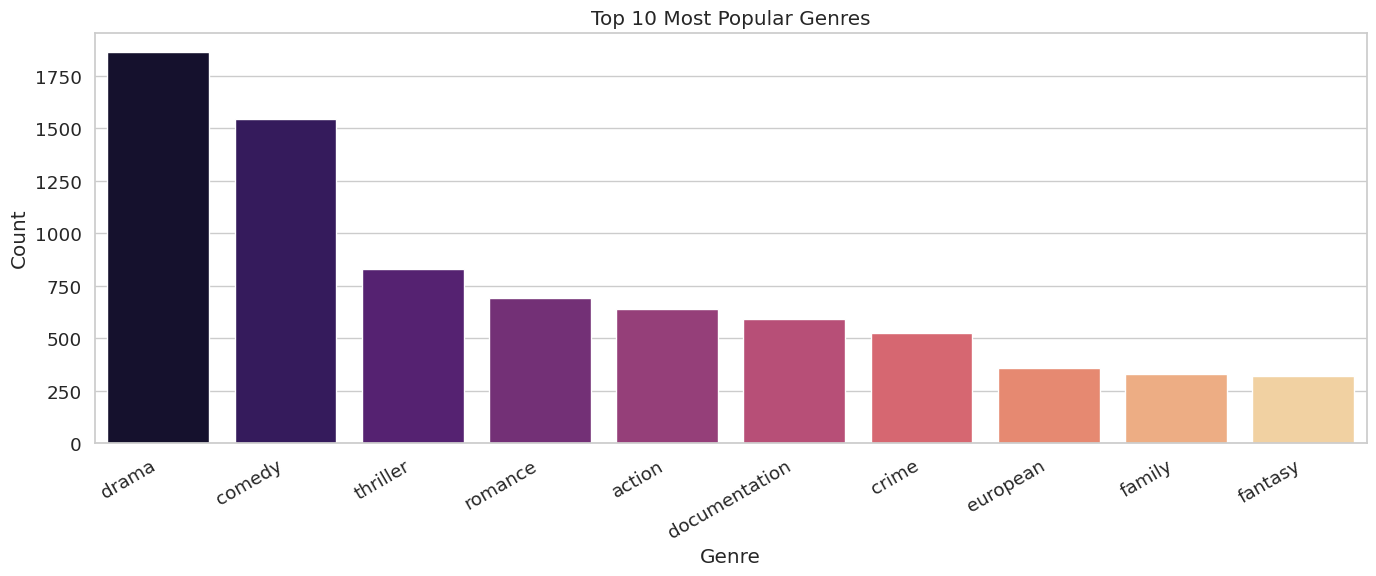

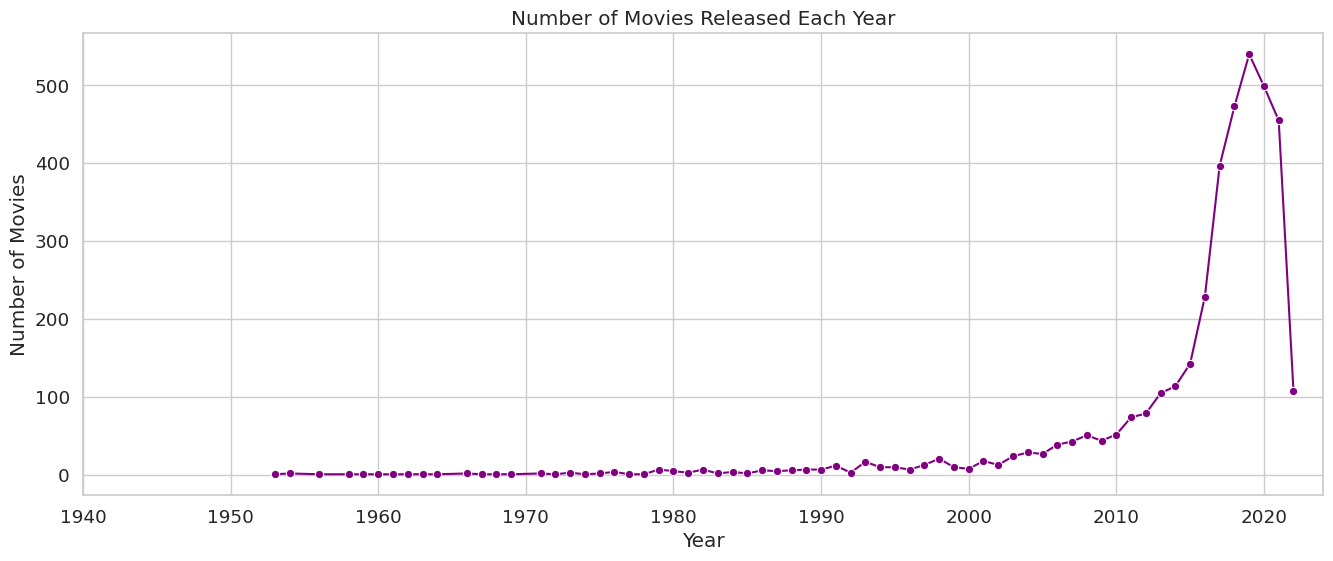

Top 10 Genres by Avg Duration:
 genre_list
war         116.478723
romance     115.368876
history     114.832117
crime       113.582061
action      112.979719
drama       111.803112
thriller    110.685542
western     107.903226
sport       104.702703
european    103.568627
Name: duration_min, dtype: float64


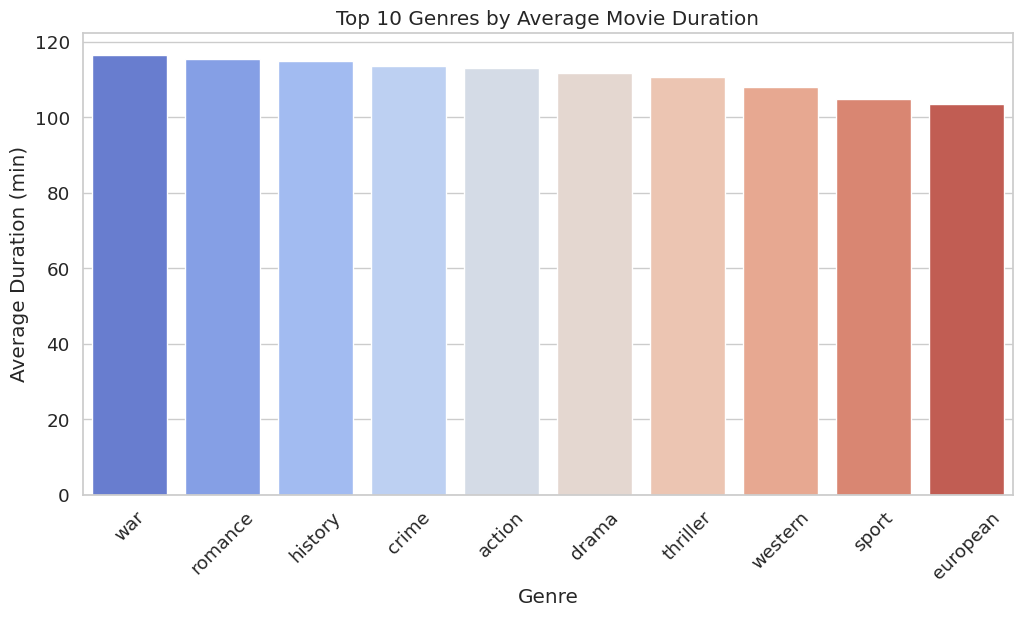

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,6)

url = "https://raw.githubusercontent.com/amirtds/kaggle-netflix-tv-shows-and-movies/main/titles.csv"
df = pd.read_csv(url, engine='python', on_bad_lines='skip', encoding='utf-8')

print("✅ دیتاست بارگذاری شد")
print("Shape اولیه:", df.shape)


if 'type' in df.columns:
    df = df[df['type'] == 'MOVIE'].copy()

print("Shape بعد از فیلتر فیلم‌ها:", df.shape)

df['duration_min'] = df['runtime']

if 'production_countries' in df.columns:
    df['country'] = df['production_countries'].fillna("").astype(str).str.replace(r"[\[\]']", "", regex=True)
    df['country'] = df['country'].replace('', 'Unknown')

    df['primary_country'] = df['country'].str.split(',').str[0]
else:
    df['primary_country'] = 'Unknown'

if 'genres' in df.columns:
    df['genres_clean'] = df['genres'].fillna("").astype(str).str.replace(r"[\[\]']", "", regex=True)

    df_genres = df.assign(genre_list=df['genres_clean'].str.split(', '))
    df_genres = df_genres.explode('genre_list')
    df_genres = df_genres[df_genres['genre_list'] != '']
else:
    df_genres = df.copy()
    df_genres['genre_list'] = 'Unknown'

# --- اصلاح سال انتشار ---
df['release_year'] = df['release_year'].fillna(0).astype(int)

print("✅ پاک‌سازی داده‌ها با موفقیت انجام شد.")

country_counts = df['primary_country'].value_counts().head(10)

if 'Unknown' in country_counts.index:
    country_counts = country_counts.drop('Unknown')

print("\nTop 10 Countries (Primary Producer):\n", country_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette="viridis", legend=False)
plt.title("Top 10 Countries Producing Movies")
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

if df['duration_min'].notna().sum() > 0:
    durations = df['duration_min'].dropna()
    print(f"Average Duration: {durations.mean():.2f} minutes")

    plt.figure(figsize=(12,6))
    sns.histplot(durations, bins=40, kde=True, color='skyblue')
    plt.title("Distribution of Movie Durations (Runtime)")
    plt.xlabel("Duration (minutes)")
    plt.ylabel("Count")
    plt.show()
else:
    print("⚠️ داده‌ای برای مدت زمان فیلم‌ها یافت نشد.")


genre_counts = df_genres['genre_list'].value_counts().head(10)
print("Top 10 Genres:\n", genre_counts)

plt.figure(figsize=(14,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette="magma", legend=False)
plt.title("Top 10 Most Popular Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

valid_years = df[df['release_year'] > 1900]['release_year']
year_counts = valid_years.value_counts().sort_index()

plt.figure(figsize=(16,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='purple')
plt.title("Number of Movies Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xlim(left=1940, right=2024)
plt.grid(True)
plt.show()

avg_duration_by_genre = df_genres.groupby('genre_list')['duration_min'].mean().sort_values(ascending=False).head(10)
print("Top 10 Genres by Avg Duration:\n", avg_duration_by_genre)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_duration_by_genre.index, y=avg_duration_by_genre.values, hue=avg_duration_by_genre.index, palette="coolwarm", legend=False)
plt.title("Top 10 Genres by Average Movie Duration")
plt.xlabel("Genre")
plt.ylabel("Average Duration (min)")
plt.xticks(rotation=45)
plt.show()
